In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("video_data_all.csv")

In [8]:
df1 = pd.read_csv("All_Participants_Combined.csv")

In [3]:
df['fms'].describe()

count    26880.000000
mean         1.962054
std          1.580007
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          7.000000
Name: fms, dtype: float64

In [5]:
import pandas as pd
import numpy as np



# Create the repeating series from 1 to 840, repeated 32 times
df['time_series'] = np.tile(np.arange(1, 841), 32)

# Display the DataFrame
print(df)

       optical_flow  hog_features  edge_intensity  scene_cuts  \
0          0.308351      0.066372        0.006603           0   
1          0.337704      0.067870        0.007473           0   
2          0.524939      0.071658        0.008573           0   
3          0.646098      0.084998        0.007684           0   
4          0.372811      0.088583        0.007126           0   
...             ...           ...             ...         ...   
26875      6.820282      0.110237        0.014584          19   
26876      5.428671      0.114738        0.015588           9   
26877      5.660928      0.109494        0.015767           8   
26878      4.492146      0.108215        0.013854           8   
26879      4.046873      0.112078        0.013004           4   

       temporal_smoothness  brightness_flicker  spectral_entropy  \
0                34.713153            0.112539         18.993091   
1                34.741825            0.239424         18.992071   
2              

In [6]:
df.columns.values

array(['optical_flow', 'hog_features', 'edge_intensity', 'scene_cuts',
       'temporal_smoothness', 'brightness_flicker', 'spectral_entropy',
       'spatial_frequency', 'luminance', 'contrast', 'fms', 'phys',
       'mental', 'att', 'digit', 'ReacTime', 'Participant',
       'Scaled_ReacTime', 'Reac_Category', 'Reac_Category_Balanced',
       'time_series'], dtype=object)

In [9]:
df1.columns.values

array(['time_series', 'optical_flow', 'hog_features', 'edge_intensity',
       'scene_cuts', 'temporal_smoothness', 'brightness_flicker',
       'spectral_entropy', 'spatial_frequency', 'luminance', 'contrast',
       'Rating', 'Participant', 'fms'], dtype=object)

In [10]:
df = df[['time_series', 'optical_flow', 'hog_features', 'edge_intensity', 'scene_cuts',
       'temporal_smoothness', 'brightness_flicker', 'spectral_entropy',
       'spatial_frequency', 'luminance', 'contrast', 'fms']]

In [11]:
df1 = df1[['time_series', 'optical_flow', 'hog_features', 'edge_intensity',
       'scene_cuts', 'temporal_smoothness', 'brightness_flicker',
       'spectral_entropy', 'spatial_frequency', 'luminance', 'contrast', 'fms']]

In [12]:
df = pd.concat([df, df1], axis=0)

In [14]:
df.columns.values

array(['time_series', 'optical_flow', 'hog_features', 'edge_intensity',
       'scene_cuts', 'temporal_smoothness', 'brightness_flicker',
       'spectral_entropy', 'spatial_frequency', 'luminance', 'contrast',
       'fms'], dtype=object)

In [15]:
Q1 = 1
Q2 = 2
Q3 = 4

# Custom function to categorize based on the provided rules
def categorize_fms(fms_value):
    if 0 <= fms_value <= Q1:
        return 0
    elif Q1 < fms_value <= Q2:
        return 1
    elif Q2 < fms_value <= Q3:
        return 2
    elif fms_value > Q3:
        return 3

# Apply the categorization to create the 'cs' column
df['cs'] = df['fms'].apply(categorize_fms)

In [16]:
df['cs'].value_counts()

cs
0    20796
2     6007
1     4410
3     2700
Name: count, dtype: int64

In [17]:
df.to_csv("video_data_all_class_vrwalk_sim21.csv")

       optical_flow  hog_features  edge_intensity  scene_cuts  \
0          0.308351      0.066372        0.006603           0   
1          0.337704      0.067870        0.007473           0   
2          0.524939      0.071658        0.008573           0   
3          0.646098      0.084998        0.007684           0   
4          0.372811      0.088583        0.007126           0   
...             ...           ...             ...         ...   
26875      6.820282      0.110237        0.014584          19   
26876      5.428671      0.114738        0.015588           9   
26877      5.660928      0.109494        0.015767           8   
26878      4.492146      0.108215        0.013854           8   
26879      4.046873      0.112078        0.013004           4   

       temporal_smoothness  brightness_flicker  spectral_entropy  \
0                34.713153            0.112539         18.993091   
1                34.741825            0.239424         18.992071   
2              

In [10]:
df = pd.read_csv("video_data_all_class_vrwalk_sim21.csv")
video_data = df[['fms', 'cs','optical_flow', 'hog_features', 'edge_intensity', 'scene_cuts',
       'temporal_smoothness', 'brightness_flicker', 'spectral_entropy',
       'spatial_frequency', 'luminance', 'contrast', 'time_series']]

In [11]:
video_data = video_data.fillna(0)

In [12]:
video_data.isnull().sum()

fms                    0
cs                     0
optical_flow           0
hog_features           0
edge_intensity         0
scene_cuts             0
temporal_smoothness    0
brightness_flicker     0
spectral_entropy       0
spatial_frequency      0
luminance              0
contrast               0
time_series            0
dtype: int64

In [30]:
df = video_data

In [ ]:
df['cs'].value_counts() 

cs
0    3995
2    1387
1    1170
3     480
Name: count, dtype: int64

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_predict
from sklearn.metrics import classification_report, precision_recall_fscore_support, accuracy_score
from xgboost import XGBClassifier
import shap
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load your DataFrame (replace with your actual data loading process)
# df = pd.read_csv('your_data.csv')

# Define features and target
X = df[['optical_flow', 'hog_features', 'edge_intensity', 'scene_cuts',
        'temporal_smoothness', 'brightness_flicker', 'spectral_entropy',
        'spatial_frequency', 'luminance', 'contrast', 'time_series']]
y = df['cs']

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Initialize the classifier
model = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=False)

# Perform cross-validation and get predictions
y_pred = cross_val_predict(model, X_res, y_res, cv=cv, method='predict')

# Print classification report
print("Classification Report:")
print(classification_report(y_res, y_pred))

# Calculate precision, recall, and F1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_res, y_pred, average=None)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate accuracy for each class
class_accuracies = {}
for class_label in np.unique(y_res):
    class_mask = y_res == class_label
    class_accuracy = accuracy_score(y_res[class_mask], y_pred[class_mask])
    class_accuracies[class_label] = class_accuracy

print("Class-Wise Accuracy:")
for class_label, acc in class_accuracies.items():
    print(f"Class {class_label}: {acc:.4f}")

# Fit the model on the whole balanced dataset for SHAP analysis
model.fit(X_res, y_res)

# SHAP analysis
# explainer = shap.Explainer(model)
# shap_values = explainer(X_res)

c:\Users\jyoti\anaconda3\envs\save\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:41:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\jyoti\anaconda3\envs\save\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:41:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\jyoti\anaconda3\envs\save\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:41:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\jyot

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.56      0.67      3995
           1       0.84      0.94      0.88      3995
           2       0.82      0.91      0.86      3995
           3       0.90      0.98      0.93      3995

    accuracy                           0.84     15980
   macro avg       0.84      0.84      0.84     15980
weighted avg       0.84      0.84      0.84     15980

Precision: [0.82507396 0.83544868 0.81725774 0.89536485]
Recall: [0.55844806 0.93917397 0.90563204 0.9767209 ]
F1 Score: [0.66606956 0.88427999 0.85917834 0.93427511]
Class-Wise Accuracy:
Class 0: 0.5584
Class 1: 0.9392
Class 2: 0.9056
Class 3: 0.9767


c:\Users\jyoti\anaconda3\envs\save\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:41:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_predict
from sklearn.metrics import classification_report, precision_recall_fscore_support, accuracy_score
from xgboost import XGBClassifier
import shap
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load your DataFrame (replace with your actual data loading process)
# df = pd.read_csv('your_data.csv')

# Define features and target
X = df[['optical_flow', 'hog_features', 'edge_intensity', 'scene_cuts',
        'temporal_smoothness', 'brightness_flicker', 'spectral_entropy',
        'spatial_frequency', 'luminance', 'contrast', 'time_series']]
y = df['cs']

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Initialize the classifier
model = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=False)

# Perform cross-validation and get predictions
y_pred = cross_val_predict(model, X_res, y_res, cv=cv, method='predict')

# Print classification report
print("Classification Report:")
print(classification_report(y_res, y_pred))

# Calculate precision, recall, and F1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_res, y_pred, average=None)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate accuracy for each class
class_accuracies = {}
for class_label in np.unique(y_res):
    class_mask = y_res == class_label
    class_accuracy = accuracy_score(y_res[class_mask], y_pred[class_mask])
    class_accuracies[class_label] = class_accuracy

print("Class-Wise Accuracy:")
for class_label, acc in class_accuracies.items():
    print(f"Class {class_label}: {acc:.4f}")

# Fit the model on the whole balanced dataset for SHAP analysis
model.fit(X_res, y_res)

# SHAP analysis
# explainer = shap.Explainer(model)
# shap_values = explainer(X_res)

c:\Users\jyoti\anaconda3\envs\save\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:42:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\jyoti\anaconda3\envs\save\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:42:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\jyoti\anaconda3\envs\save\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:42:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\jyot

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.56      0.67      3995
           1       0.84      0.94      0.88      3995
           2       0.82      0.91      0.86      3995
           3       0.90      0.98      0.93      3995

    accuracy                           0.84     15980
   macro avg       0.84      0.84      0.84     15980
weighted avg       0.84      0.84      0.84     15980

Precision: [0.82507396 0.83544868 0.81725774 0.89536485]
Recall: [0.55844806 0.93917397 0.90563204 0.9767209 ]
F1 Score: [0.66606956 0.88427999 0.85917834 0.93427511]
Class-Wise Accuracy:
Class 0: 0.5584
Class 1: 0.9392
Class 2: 0.9056
Class 3: 0.9767


c:\Users\jyoti\anaconda3\envs\save\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:42:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_fscore_support, accuracy_score
from imblearn.over_sampling import SMOTE
import numpy as np

# Feature extraction and target definition
X = df[['optical_flow', 'hog_features', 'edge_intensity', 'scene_cuts',
        'temporal_smoothness', 'brightness_flicker', 'spectral_entropy',
        'spatial_frequency', 'luminance', 'contrast', 'time_series']]
y = df['cs']

# First split the original dataframe into training and test sets
# Take the first 26880 rows for training
X_train_raw = X[:26880]
y_train_raw = y[:26880]

# Use the remaining data for testing
X_test = X[26880:]
y_test = y[26880:]

print(f"Original training data size: {X_train_raw.shape[0]} samples")
print(f"Original testing data size: {X_test.shape[0]} samples")

# Display class distribution in original training data
print("\nOriginal training class distribution:")
print(np.bincount(y_train_raw))

# Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train_raw, y_train_raw)

print("\nBalanced training class distribution after SMOTE:")
print(np.bincount(y_train))
print(f"Balanced training data size: {X_train.shape[0]} samples")

# Display class distribution in test data
print("\nTest data class distribution (unmodified):")
print(np.bincount(y_test))

# Initialize the classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the balanced training data
model_rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = model_rf.predict(X_test)

# Print classification report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Calculate precision, recall, and F1 score
precision_rf, recall_rf, f1_rf, _ = precision_recall_fscore_support(y_test, y_pred_rf, average=None)
print("\nPrecision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

# Calculate accuracy for each class
class_accuracies_rf = {}
for class_label in np.unique(y_test):
    class_mask = y_test == class_label
    class_accuracy = accuracy_score(y_test[class_mask], y_pred_rf[class_mask])
    class_accuracies_rf[class_label] = class_accuracy

print("\nClass-Wise Accuracy:")
for class_label, acc in class_accuracies_rf.items():
    print(f"Class {class_label}: {acc:.4f}")

# Overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"\nOverall Test Accuracy: {overall_accuracy:.4f}")

# Feature importance
feature_names = X.columns
importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("\nFeature Ranking:")
for i in range(X.shape[1]):
    print(f"{i+1}. {feature_names[indices[i]]} ({importances[indices[i]]:.4f})")

# Optional SHAP analysis
# import shap
# explainer = shap.TreeExplainer(model_rf)
# shap_values = explainer.shap_values(X_test)

Original training data size: 26880 samples
Original testing data size: 7033 samples

Original training class distribution:
[16800  3240  4620  2220]

Balanced training class distribution after SMOTE:
[16800 16800 16800 16800]
Balanced training data size: 67200 samples

Test data class distribution (unmodified):
[3996 1170 1387  480]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.99      0.72      3996
           1       0.00      0.00      0.00      1170
           2       0.00      0.00      0.00      1387
           3       0.00      0.00      0.00       480

    accuracy                           0.56      7033
   macro avg       0.14      0.25      0.18      7033
weighted avg       0.32      0.56      0.41      7033


Precision: [0.56583274 0.         0.         0.        ]
Recall: [0.99049049 0.         0.         0.        ]
F1 Score: [0.72022564 0.         0.         0.        ]

Class-Wise Accuracy:
Cl

c:\Users\jyoti\anaconda3\envs\save\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jyoti\anaconda3\envs\save\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jyoti\anaconda3\envs\save\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jyoti\anaconda3\

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_predict
from sklearn.metrics import classification_report, precision_recall_fscore_support, accuracy_score
from xgboost import XGBClassifier
import shap
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load your DataFrame (replace with your actual data loading process)
# df = pd.read_csv('your_data.csv')

# Define features and target
X = df[['optical_flow', 'hog_features', 'edge_intensity', 'scene_cuts',
        'temporal_smoothness', 'brightness_flicker', 'spectral_entropy',
        'spatial_frequency', 'luminance', 'contrast', 'time_series']]
y = df['cs']

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

c:\Users\jyoti\anaconda3\envs\save\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report, precision_recall_fscore_support, accuracy_score
from imblearn.over_sampling import SMOTE
import shap

# Initialize the classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=False)

# Perform cross-validation and get predictions
y_pred_rf = cross_val_predict(model_rf, X_res, y_res, cv=cv, method='predict')

# Print classification report
print("Random Forest Classification Report:")
print(classification_report(y_res, y_pred_rf))

# Calculate precision, recall, and F1 score
precision_rf, recall_rf, f1_rf, _ = precision_recall_fscore_support(y_res, y_pred_rf, average=None)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

# Calculate accuracy for each class
class_accuracies_rf = {}
for class_label in np.unique(y_res):
    class_mask = y_res == class_label
    class_accuracy = accuracy_score(y_res[class_mask], y_pred_rf[class_mask])
    class_accuracies_rf[class_label] = class_accuracy

print("Class-Wise Accuracy:")
for class_label, acc in class_accuracies_rf.items():
    print(f"Class {class_label}: {acc:.4f}")

# Fit the model on the whole balanced dataset for SHAP analysis
model_rf.fit(X_res, y_res)

# SHAP analysis
# explainer_rf = shap.Explainer(model_rf)
# shap_values_rf = explainer_rf(X_res)
# shap.summary_plot(shap_values_rf, X_res)


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.54      0.67      3995
           1       0.82      0.95      0.88      3995
           2       0.81      0.93      0.87      3995
           3       0.91      0.98      0.94      3995

    accuracy                           0.85     15980
   macro avg       0.86      0.85      0.84     15980
weighted avg       0.86      0.85      0.84     15980

Precision: [0.88053637 0.82210708 0.81432012 0.9087963 ]
Recall: [0.54242804 0.95319149 0.93091364 0.98272841]
F1 Score: [0.67131351 0.88280978 0.86872226 0.9443175 ]
Class-Wise Accuracy:
Class 0: 0.5424
Class 1: 0.9532
Class 2: 0.9309
Class 3: 0.9827


RandomForestClassifier(random_state=42)

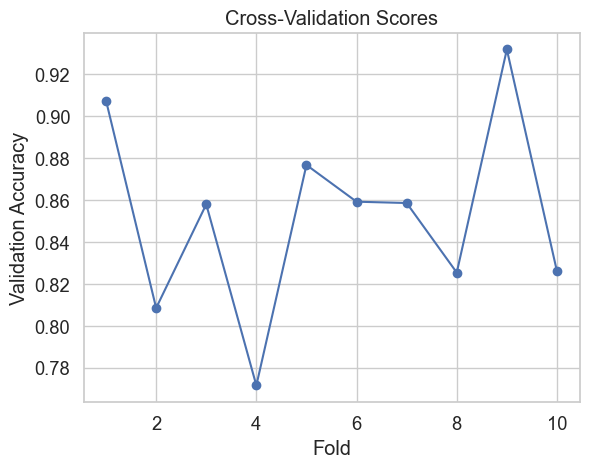

In [29]:
from sklearn.model_selection import cross_val_score

# Example with Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

cv_scores = cross_val_score(model_rf, X_res, y_res, cv=StratifiedKFold(n_splits=10))

plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o')
plt.ylabel("Validation Accuracy")
plt.xlabel("Fold")
plt.title("Cross-Validation Scores")
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the classifier
model_gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=False)

# Perform cross-validation and get predictions
y_pred_gb = cross_val_predict(model_gb, X_res, y_res, cv=cv, method='predict')

# Print classification report
print("Gradient Boosting Classification Report:")
print(classification_report(y_res, y_pred_gb))

# Calculate precision, recall, and F1 score
precision_gb, recall_gb, f1_gb, _ = precision_recall_fscore_support(y_res, y_pred_gb, average=None)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1 Score:", f1_gb)

# Calculate accuracy for each class
class_accuracies_gb = {}
for class_label in np.unique(y_res):
    class_mask = y_res == class_label
    class_accuracy = accuracy_score(y_res[class_mask], y_pred_gb[class_mask])
    class_accuracies_gb[class_label] = class_accuracy

print("Class-Wise Accuracy:")
for class_label, acc in class_accuracies_gb.items():
    print(f"Class {class_label}: {acc:.4f}")

# Fit the model on the whole balanced dataset for SHAP analysis
model_gb.fit(X_res, y_res)

# SHAP analysis
# explainer_gb = shap.Explainer(model_gb)
# shap_values_gb = explainer_gb(X_res)
# shap.summary_plot(shap_values_gb, X_res)


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.38      0.42     16800
           1       0.47      0.48      0.47     16800
           2       0.43      0.44      0.44     16800
           3       0.50      0.59      0.54     16800

    accuracy                           0.47     67200
   macro avg       0.47      0.47      0.47     67200
weighted avg       0.47      0.47      0.47     67200

Precision: [0.48537071 0.4656462  0.43455835 0.49914297]
Recall: [0.37720238 0.47803571 0.44130952 0.58934524]
F1 Score: [0.42450429 0.47175963 0.43790792 0.54050661]
Class-Wise Accuracy:
Class 0: 0.3772
Class 1: 0.4780
Class 2: 0.4413
Class 3: 0.5893


GradientBoostingClassifier(random_state=42)

In [ ]:
from sklearn.ensemble import VotingClassifier

# Initialize the classifiers
clf1 = RandomForestClassifier(n_estimators=100, random_state=42)
clf2 = GradientBoostingClassifier(n_estimators=100, random_state=42)
clf3 = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42)

# Combine them in a VotingClassifier
model_voting = VotingClassifier(estimators=[
    ('rf', clf1), ('gb', clf2), ('xgb', clf3)], voting='soft')

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=False)

# Perform cross-validation and get predictions
y_pred_voting = cross_val_predict(model_voting, X_res, y_res, cv=cv, method='predict')

# Print classification report
print("Voting Classifier Classification Report:")
print(classification_report(y_res, y_pred_voting))

# Calculate precision, recall, and F1 score
precision_voting, recall_voting, f1_voting, _ = precision_recall_fscore_support(y_res, y_pred_voting, average=None)
print("Precision:", precision_voting)
print("Recall:", recall_voting)
print("F1 Score:", f1_voting)

# Calculate accuracy for each class
class_accuracies_voting = {}
for class_label in np.unique(y_res):
    class_mask = y_res == class_label
    class_accuracy = accuracy_score(y_res[class_mask], y_pred_voting[class_mask])
    class_accuracies_voting[class_label] = class_accuracy

print("Class-Wise Accuracy:")
for class_label, acc in class_accuracies_voting.items():
    print(f"Class {class_label}: {acc:.4f}")

# Fit the model on the whole balanced dataset for SHAP analysis
model_voting.fit(X_res, y_res)

# SHAP analysis
# explainer_voting = shap.Explainer(model_voting)
# shap_values_voting = explainer_voting(X_res)
# shap.summary_plot(shap_values_voting, X_res)


c:\Users\jyoti\anaconda3\envs\save\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:36:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\jyoti\anaconda3\envs\save\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:39:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\jyoti\anaconda3\envs\save\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:42:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\jyot

Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.49      0.58     16800
           1       0.73      0.81      0.77     16800
           2       0.71      0.74      0.73     16800
           3       0.76      0.89      0.82     16800

    accuracy                           0.73     67200
   macro avg       0.73      0.73      0.72     67200
weighted avg       0.73      0.73      0.72     67200

Precision: [0.7255075  0.72916779 0.70735294 0.75969427]
Recall: [0.48928571 0.80577381 0.74440476 0.88744048]
F1 Score: [0.58442943 0.76555917 0.72540603 0.81861359]
Class-Wise Accuracy:
Class 0: 0.4893
Class 1: 0.8058
Class 2: 0.7444
Class 3: 0.8874


c:\Users\jyoti\anaconda3\envs\save\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:05:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feat...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

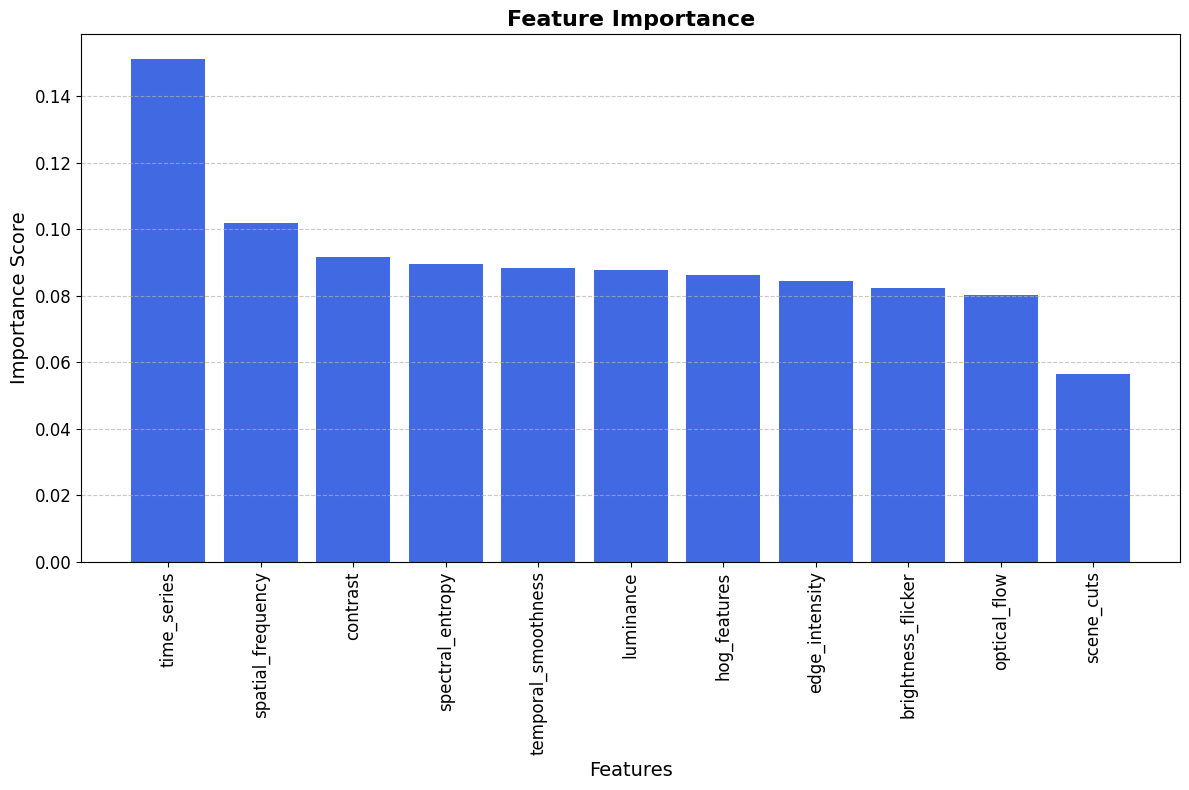

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Fit the model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_res, y_res)

# Get feature importances
importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.bar(range(X_res.shape[1]), importances[indices], align="center", color='royalblue')
plt.xticks(range(X_res.shape[1]), X_res.columns[indices], rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Feature Importance", fontsize=16, fontweight='bold')
plt.xlabel("Features", fontsize=14)
plt.ylabel("Importance Score", fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig("feature_importance_plot.pdf", format='pdf')

# Show the plot
plt.show()


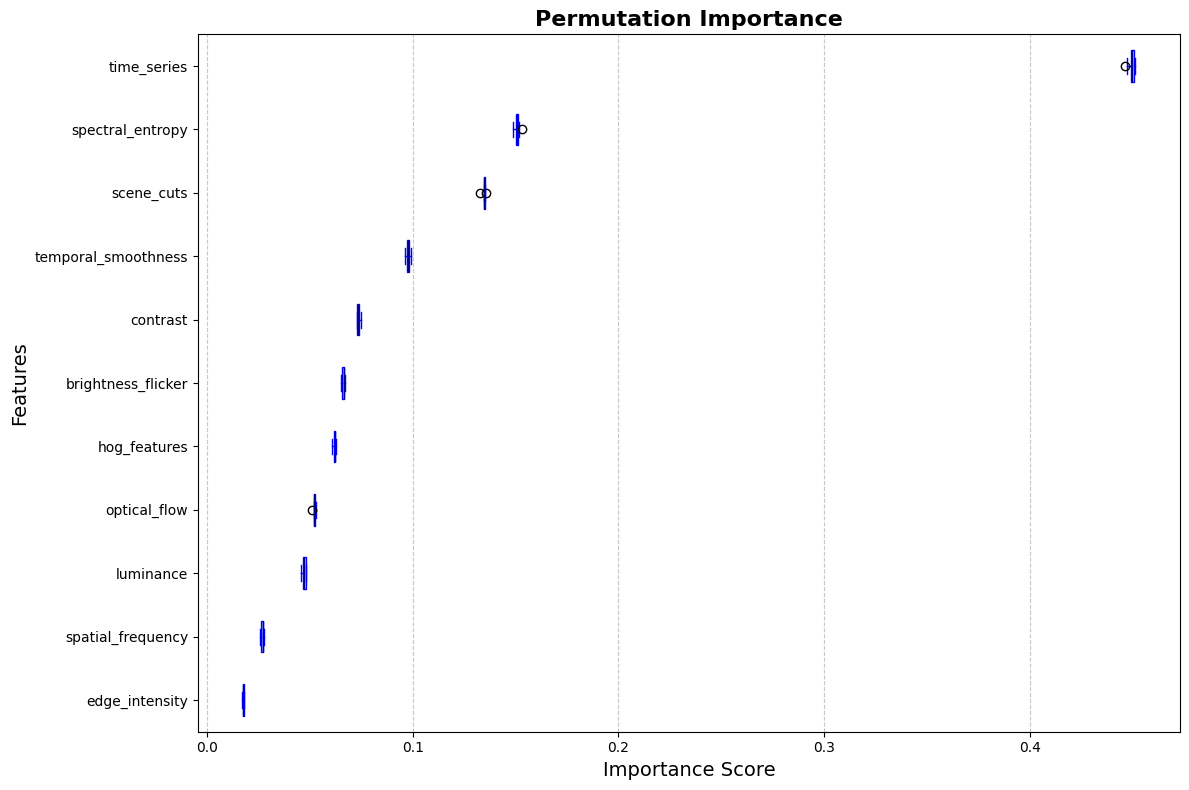

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Fit the model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_res, y_res)

# Compute permutation importance
result = permutation_importance(model_rf, X_res, y_res, n_repeats=10, random_state=42, n_jobs=-1)

# Plot permutation importance with improvements
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(12, 8))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_res.columns[sorted_idx], patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'), 
            medianprops=dict(color='darkblue'), 
            whiskerprops=dict(color='blue'), capprops=dict(color='blue'))

plt.title("Permutation Importance", fontsize=16, fontweight='bold')
plt.xlabel("Importance Score", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig("permutation_importance_plot.pdf", format='pdf')

# Show the plot
plt.show()


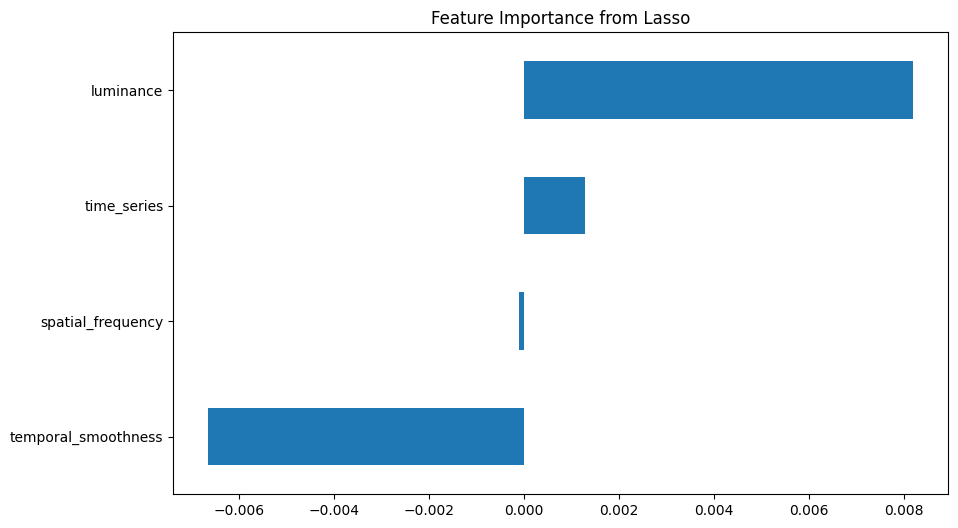

In [ ]:
from sklearn.linear_model import LassoCV

# Fit Lasso model
lasso = LassoCV(cv=10, random_state=42).fit(X_res, y_res)

# Get coefficients
coef = pd.Series(lasso.coef_, index=X_res.columns)

# Plot non-zero coefficients
important_features = coef[coef != 0]
important_features.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importance from Lasso")
plt.show()


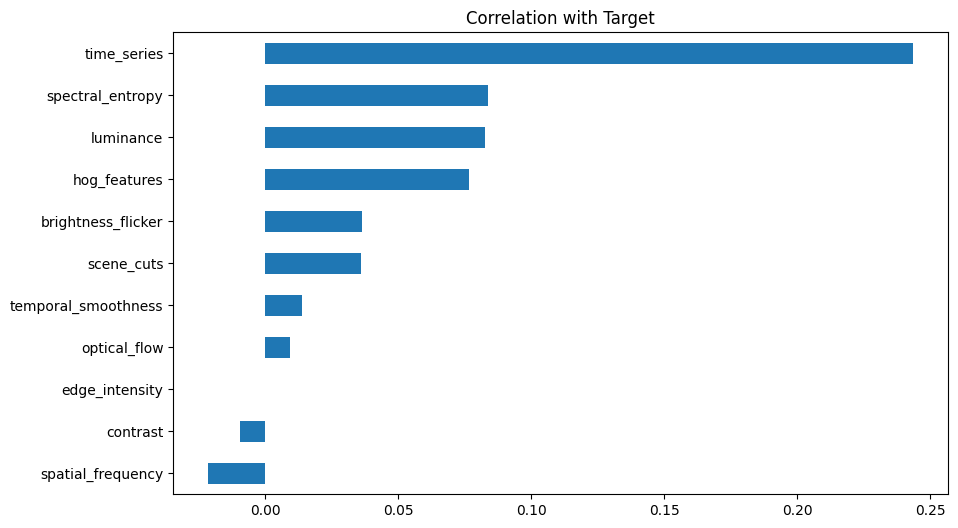

In [ ]:
correlations = video_data.corr()
correlation_with_target = correlations['cs'].drop('cs').sort_values()

# Plot correlation with target
correlation_with_target.plot(kind='barh', figsize=(10, 6))
plt.title("Correlation with Target")
plt.show()


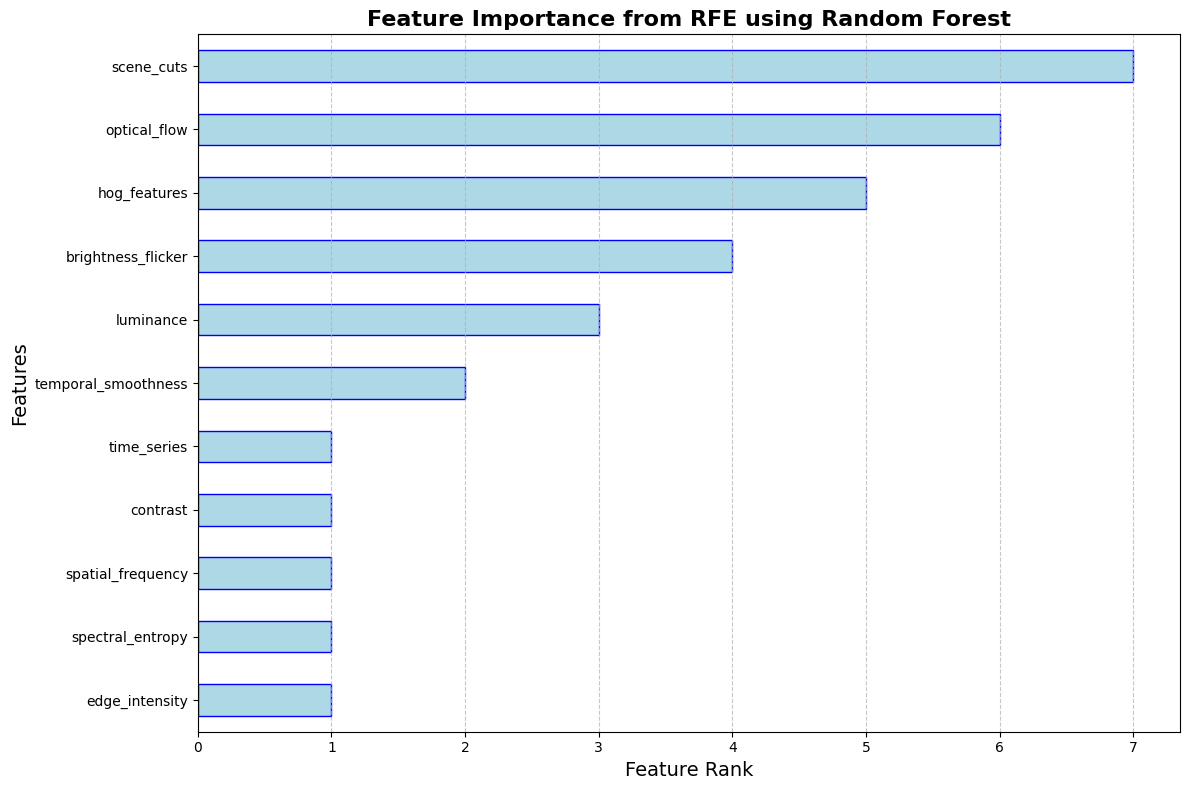

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the RandomForest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize RFE with RandomForest
rfe = RFE(model_rf, n_features_to_select=5)
rfe.fit(X_res, y_res)

# Get ranking of features
ranking = rfe.ranking_
rfe_ranking = pd.Series(ranking, index=X_res.columns).sort_values()

# Plot RFE ranking with improvements
plt.figure(figsize=(12, 8))
rfe_ranking.plot(kind='barh', color='lightblue', edgecolor='blue')
plt.title("Feature Importance from RFE using Random Forest", fontsize=16, fontweight='bold')
plt.xlabel("Feature Rank", fontsize=20)
plt.ylabel("Features", fontsize=20)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig("RFE_feature_importance_rf.pdf", format='pdf')

# Show the plot
plt.show()


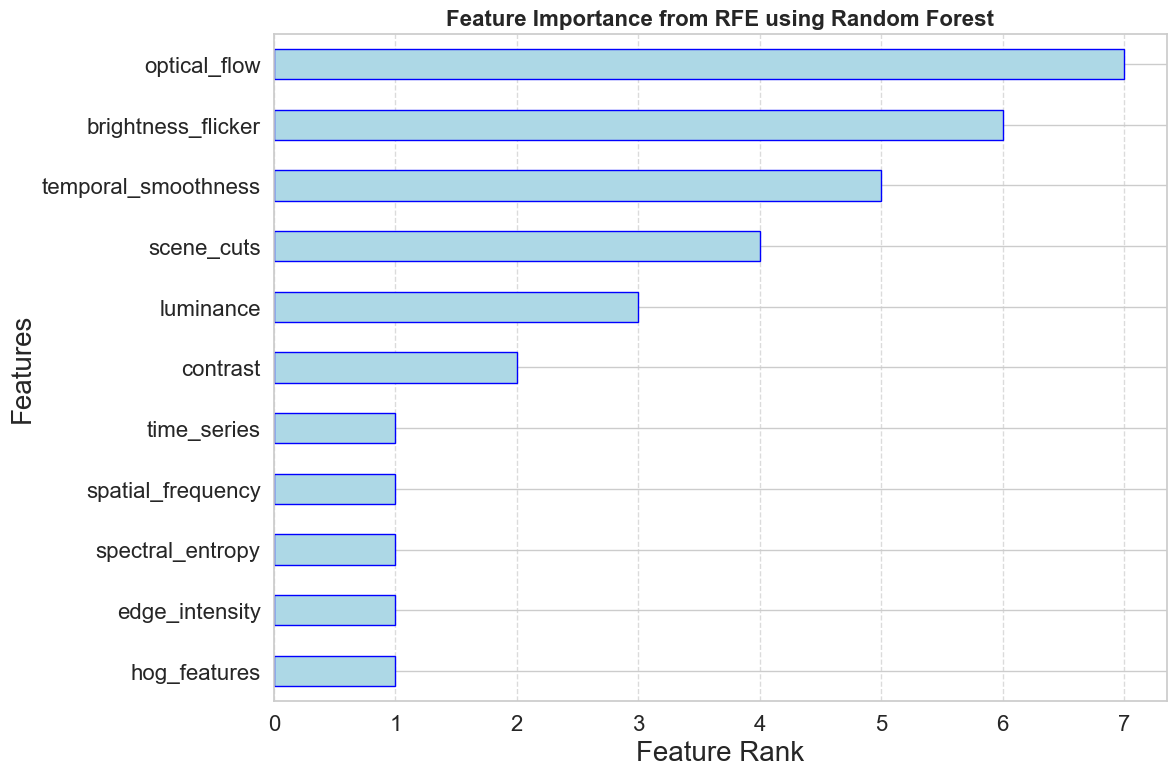

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the RandomForest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize RFE with RandomForest
rfe = RFE(model_rf, n_features_to_select=5)
rfe.fit(X_res, y_res)

# Get ranking of features
ranking = rfe.ranking_
rfe_ranking = pd.Series(ranking, index=X_res.columns).sort_values()

# Plot RFE ranking with improvements
plt.figure(figsize=(12, 8))
rfe_ranking.plot(kind='barh', color='lightblue', edgecolor='blue')
plt.title("Feature Importance from RFE using Random Forest", fontsize=16, fontweight='bold')
plt.xlabel("Feature Rank", fontsize=20)  # Original was fontsize=20
plt.ylabel("Features", fontsize=20)      # Original was fontsize=20

# Make the axis tick labels larger
plt.xticks(fontsize=16)  # Increase x-axis tick label size
plt.yticks(fontsize=16)  # Increase y-axis tick label size

plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig("RFE_feature_importance_rf.pdf", format='pdf')

# Show the plot
plt.show()

Mean Squared Error: 2.6557876189313907
Mean Absolute Error: 1.2207055231183783
R² Score: -0.06387770276016425


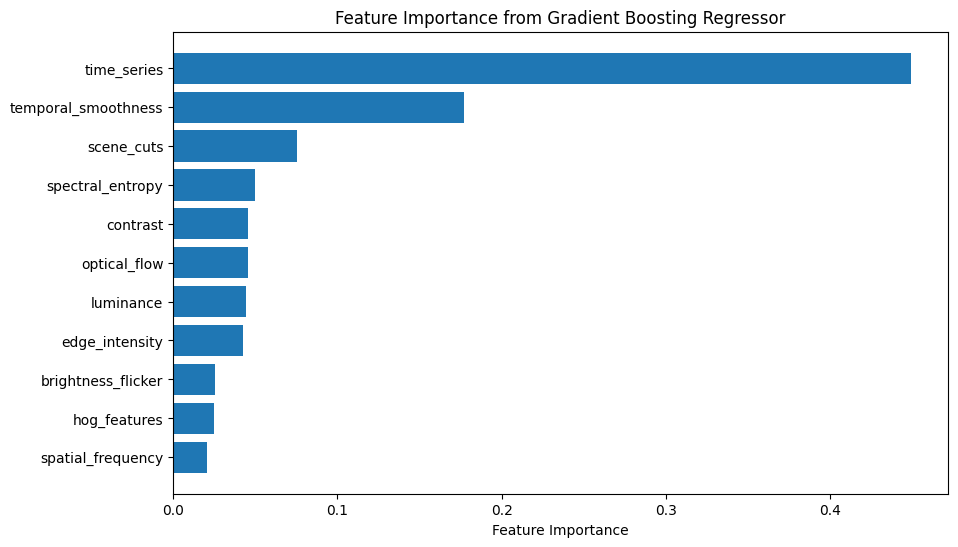

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

# Load your DataFrame (replace with your actual data loading process)
# df = pd.read_csv('your_data.csv')

# Define features and target
X = df[['optical_flow', 'hog_features', 'edge_intensity', 'scene_cuts',
        'temporal_smoothness', 'brightness_flicker', 'spectral_entropy',
        'spatial_frequency', 'luminance', 'contrast', 'time_series']]
y = df['fms']

# Initialize the regressor
model = GradientBoostingRegressor()

# Cross-validation setup
cv = KFold(n_splits=10, shuffle=False)

# Perform cross-validation and get predictions
y_pred = cross_val_predict(model, X, y, cv=cv)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y, y_pred))
print("R² Score:", r2_score(y, y_pred))

# Fit the model on the whole dataset for feature importance analysis
model.fit(X, y)

# Feature importance from the model
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(X.shape[1]), feature_importance[sorted_idx], align='center')
plt.yticks(range(X.shape[1]), [X.columns[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance from Gradient Boosting Regressor")
plt.show()




Linear Regression:
R²: 0.0685
SRCC: 0.2407
PLCC: 0.2618
RMSE: 1.4851


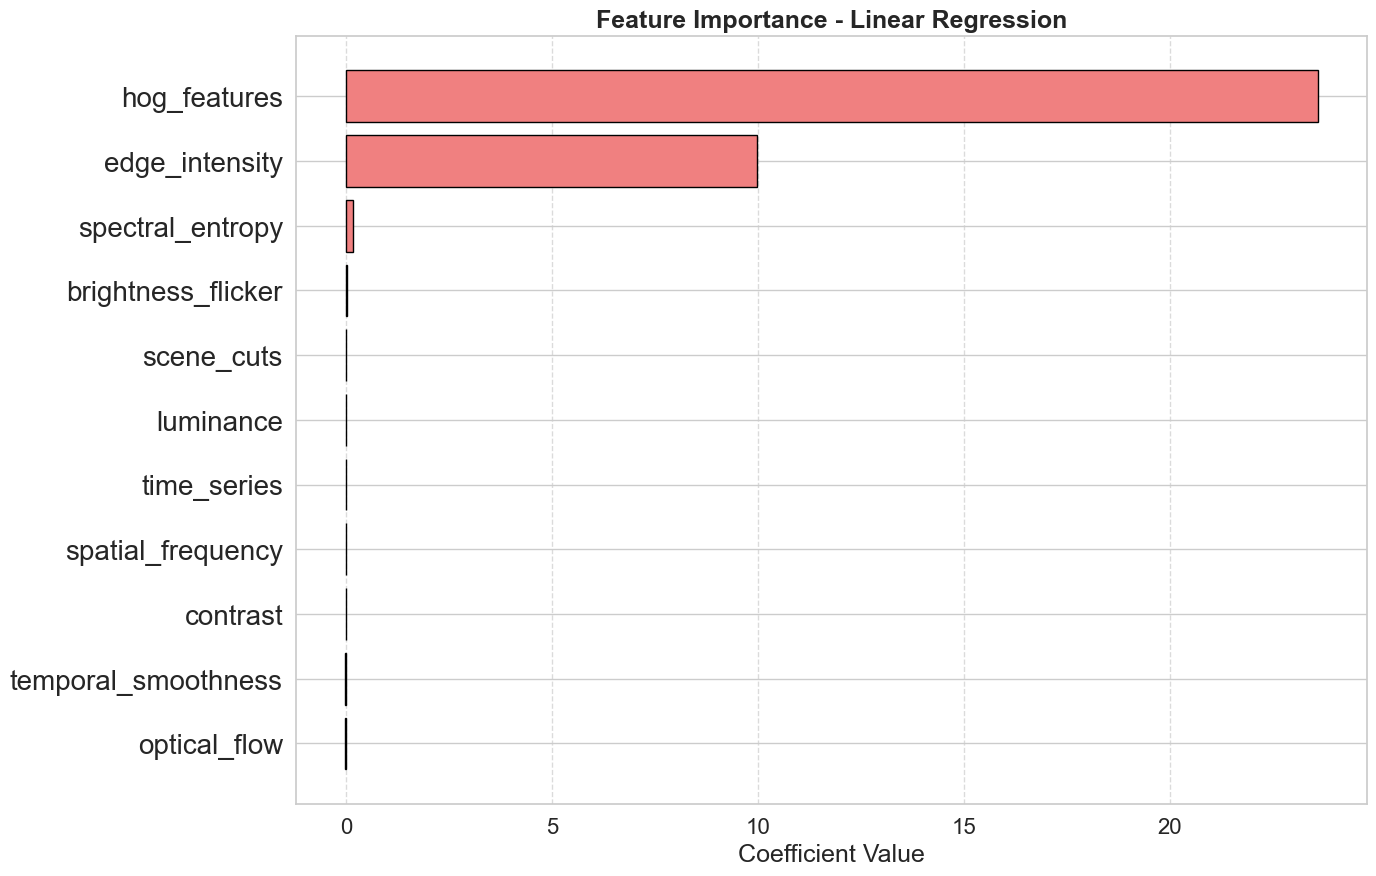


--------------------------------------------------

Ridge Regression:
R²: 0.0659
SRCC: 0.2350
PLCC: 0.2569
RMSE: 1.4872


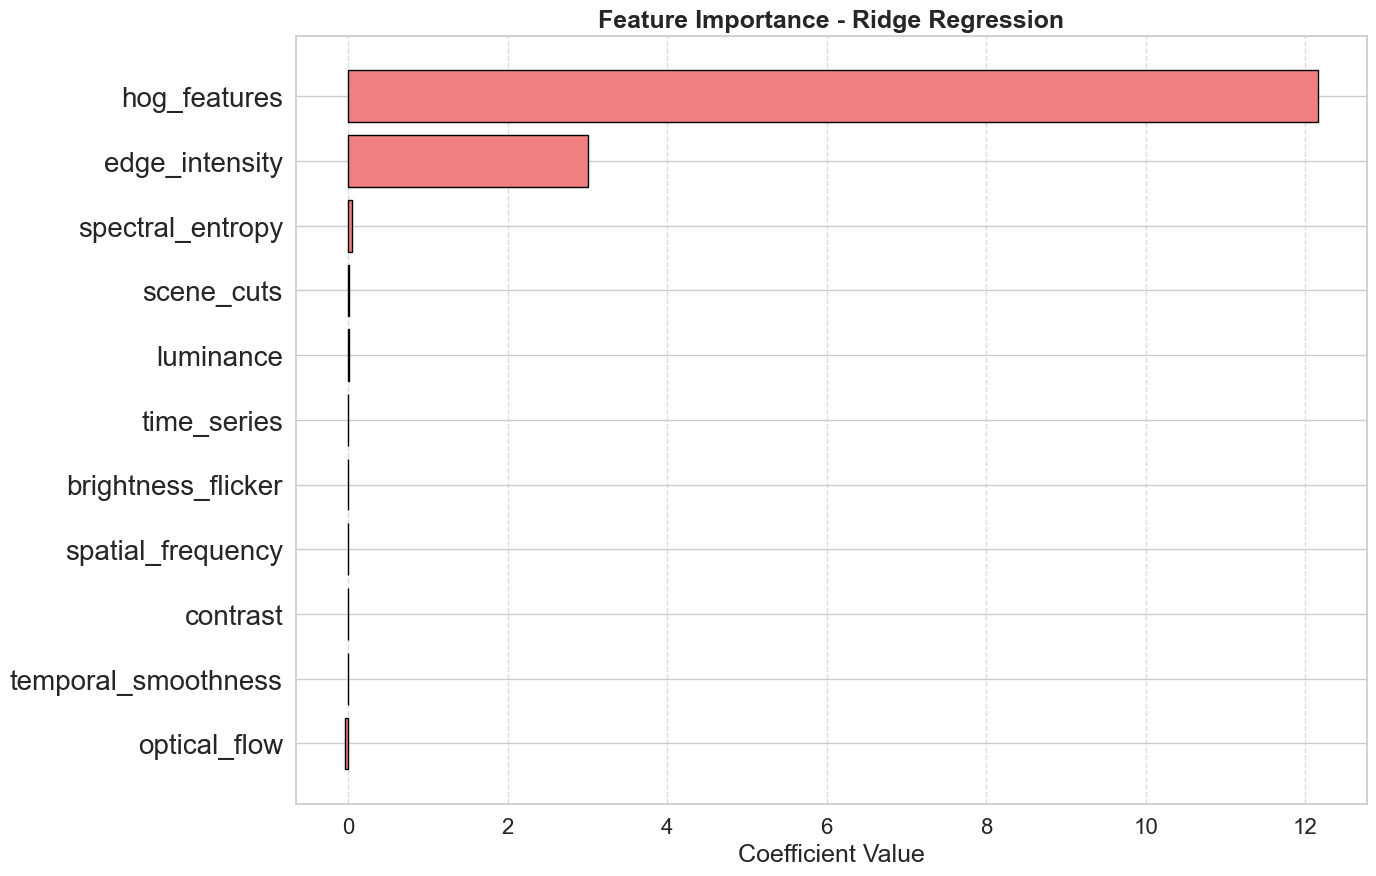


--------------------------------------------------

Random Forest:
R²: 0.2182
SRCC: 0.4045
PLCC: 0.4686
RMSE: 1.3605


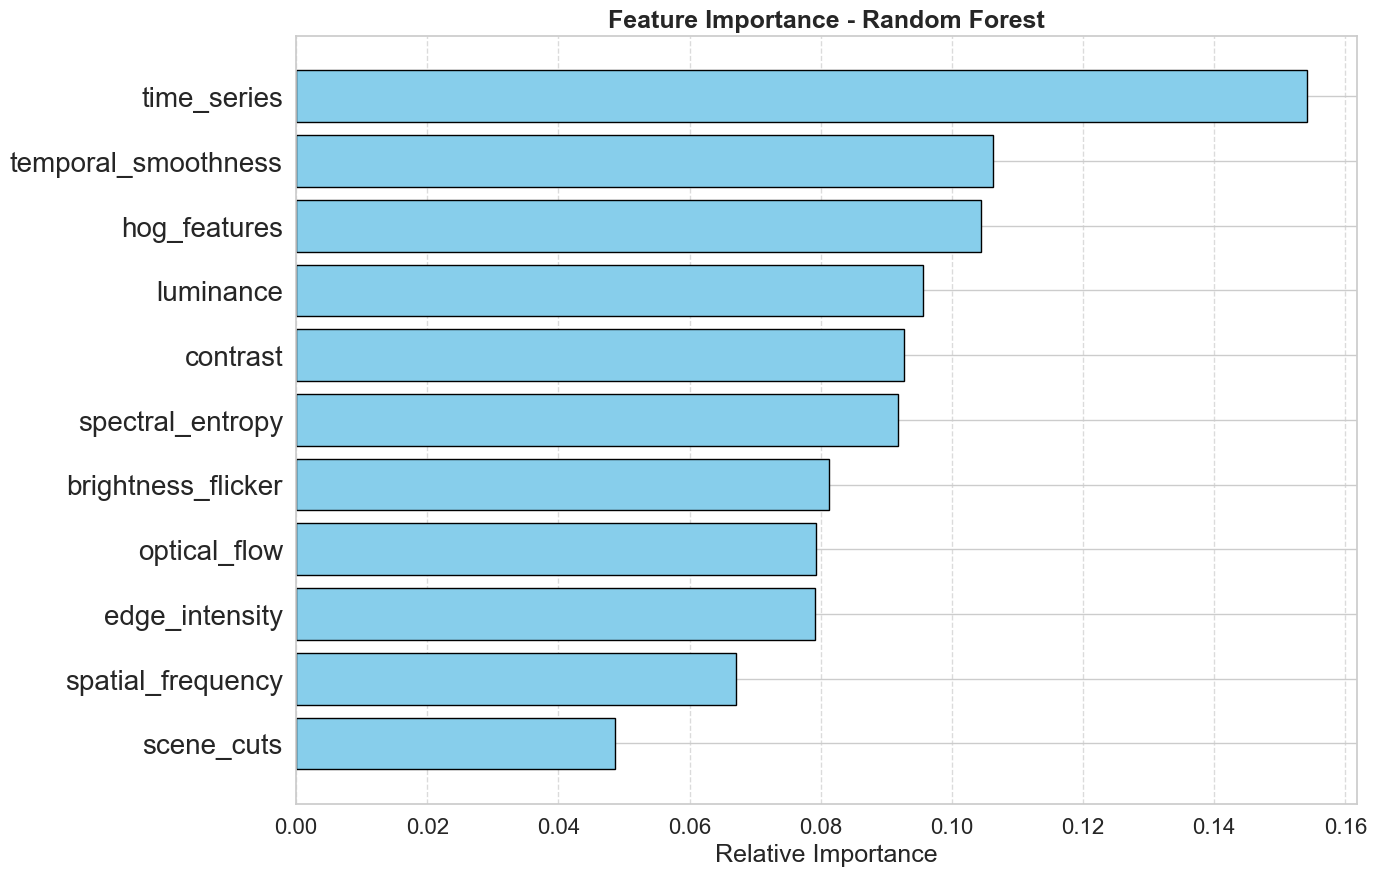


--------------------------------------------------

Gradient Boosting:
R²: 0.1286
SRCC: 0.3023
PLCC: 0.3629
RMSE: 1.4364


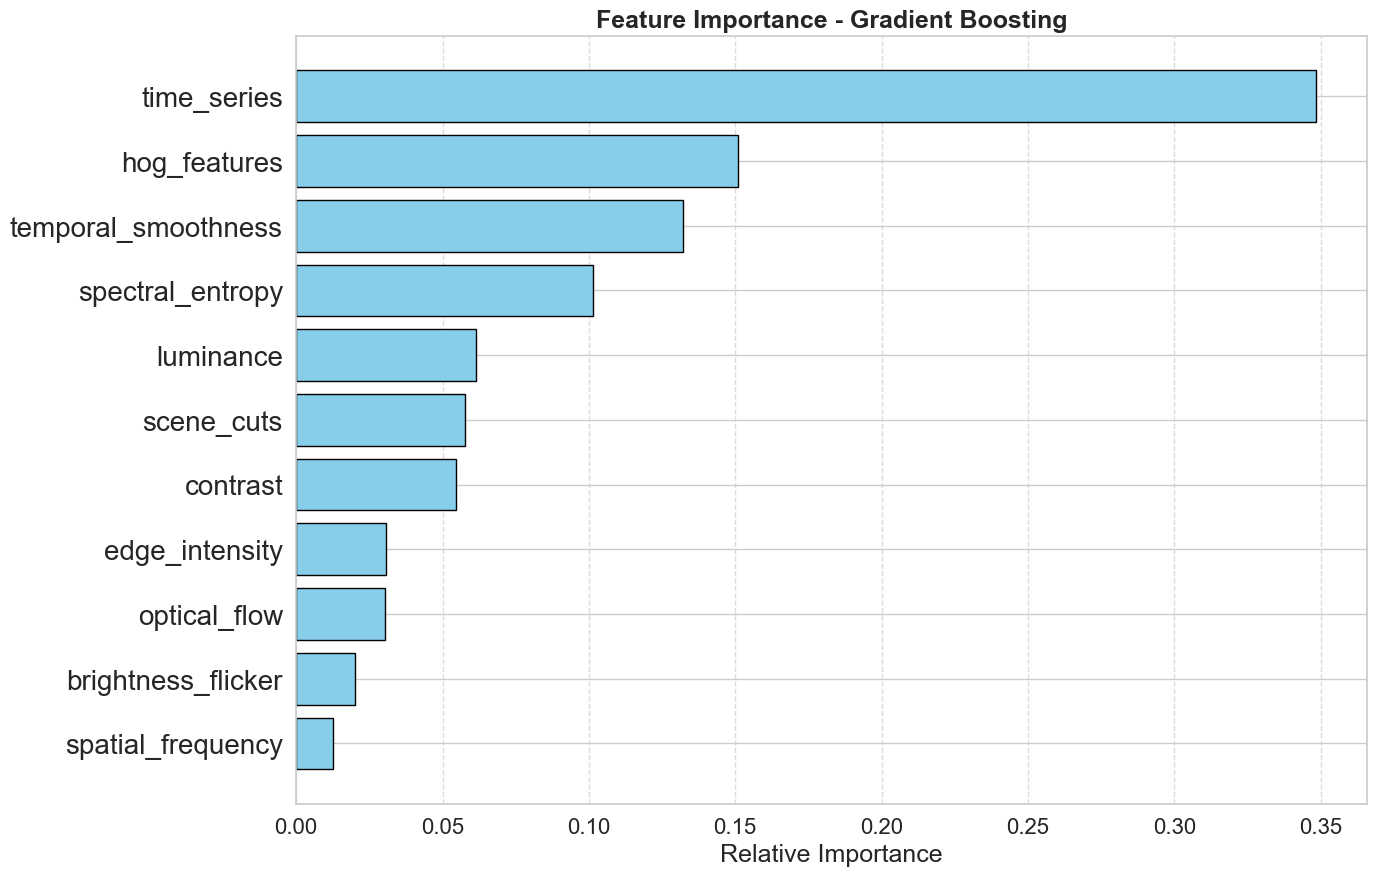


--------------------------------------------------

Support Vector Regressor:
R²: -0.2941
SRCC: 0.1279
PLCC: 0.0022
RMSE: 1.7505


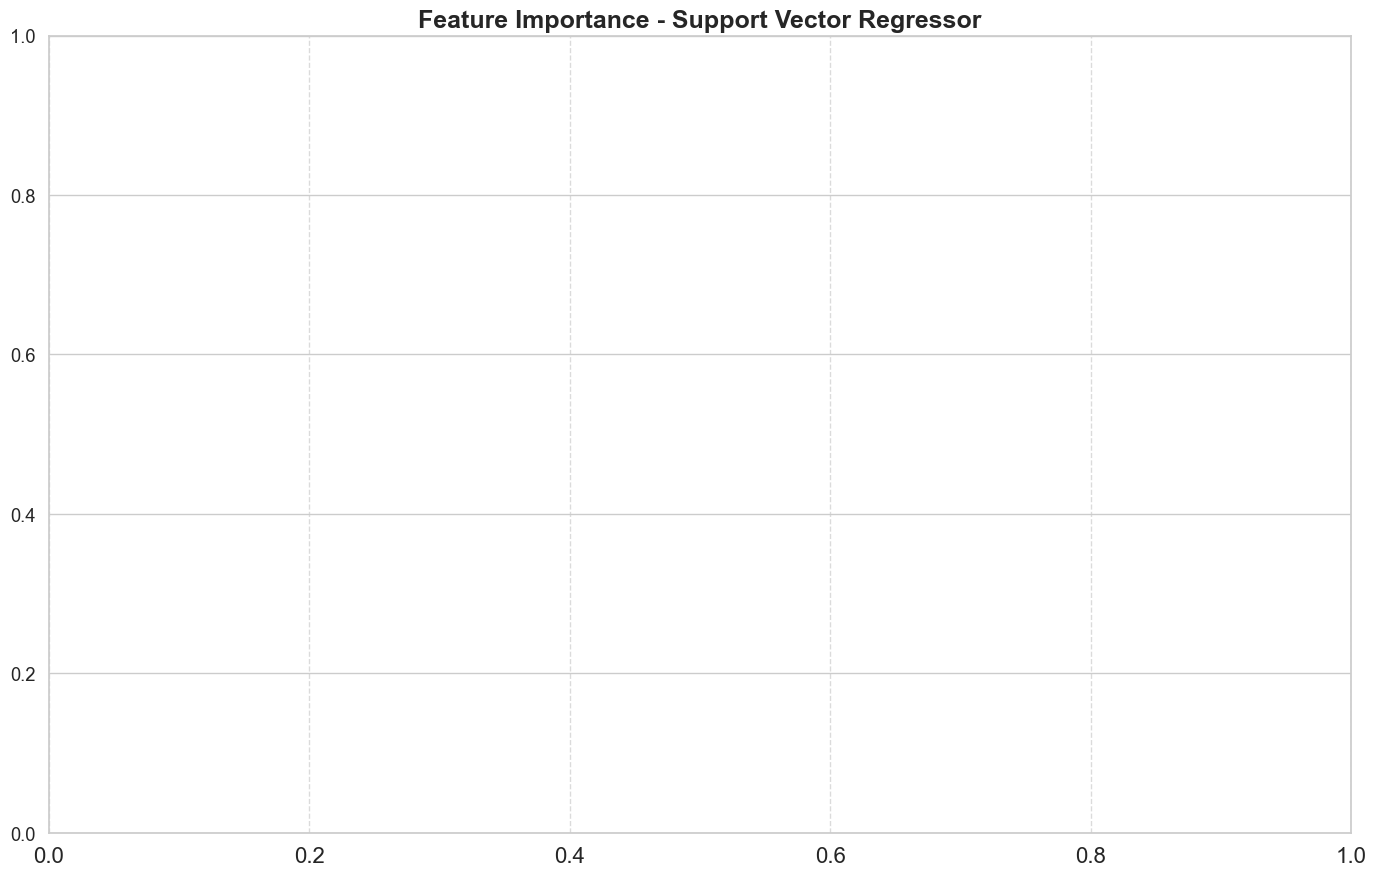


--------------------------------------------------

XGBoost Regressor:
R²: 0.1834
SRCC: 0.3611
PLCC: 0.4333
RMSE: 1.3905


c:\Users\jyoti\anaconda3\envs\save\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:46:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


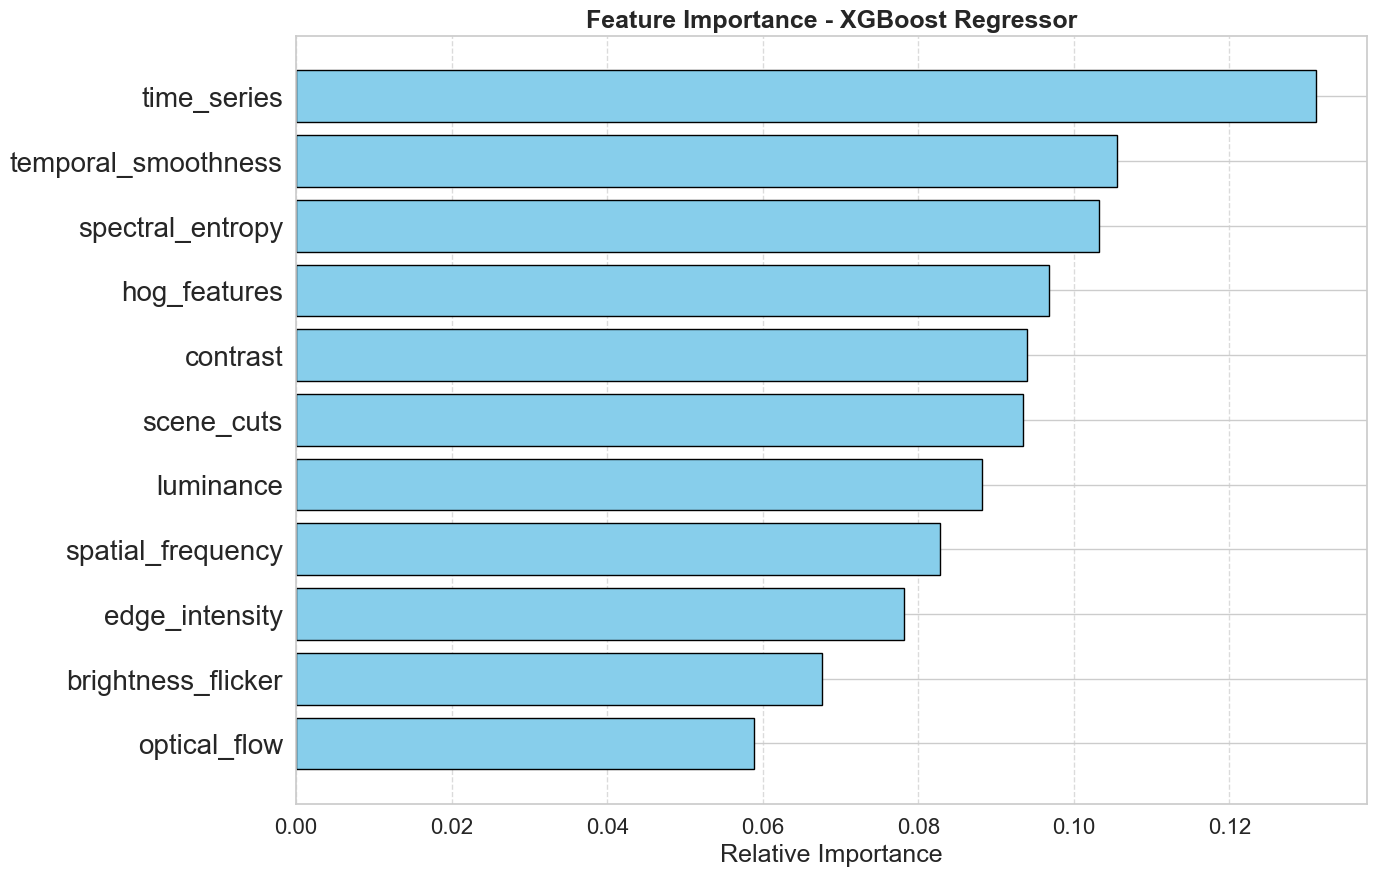


--------------------------------------------------



In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

# Set seaborn style for better aesthetics
sns.set(style="whitegrid", font_scale=1.2)  # Increased font_scale for overall larger text

# Define features and target (replace this with your actual DataFrame)
# df = pd.read_csv('your_data.csv')

X = df[['optical_flow', 'hog_features', 'edge_intensity', 'scene_cuts',
        'temporal_smoothness', 'brightness_flicker', 'spectral_entropy',
        'spatial_frequency', 'luminance', 'contrast', 'time_series']]
y = df['fms']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(),
    "XGBoost Regressor": XGBRegressor(eval_metric='rmse', use_label_encoder=False)
}

# Function to evaluate and plot feature importance
def evaluate_and_plot(model_name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # R², SRCC, PLCC, and RMSE
    r2 = r2_score(y_test, y_pred)
    srcc, _ = spearmanr(y_test, y_pred)
    plcc, _ = pearsonr(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"{model_name}:")
    print(f"R²: {r2:.4f}")
    print(f"SRCC: {srcc:.4f}")
    print(f"PLCC: {plcc:.4f}")
    print(f"RMSE: {rmse:.4f}")
    
    # Feature Importance
    plt.figure(figsize=(14, 9))  # Increased figure size for better readability
    
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        indices = np.argsort(importances)
        plt.barh(range(len(indices)), importances[indices], align="center", color='skyblue', edgecolor='black')
        plt.yticks(range(len(indices)), [X.columns[i] for i in indices], fontsize=20)  # Increased from 12 to 14
        plt.xlabel("Relative Importance", fontsize=18)  # Increased from 14 to 16
    elif hasattr(model, "coef_"):
        importances = model.coef_
        indices = np.argsort(importances)
        plt.barh(range(len(indices)), importances[indices], align="center", color='lightcoral', edgecolor='black')
        plt.yticks(range(len(indices)), [X.columns[i] for i in indices], fontsize=20)  # Increased from 12 to 14
        plt.xlabel("Coefficient Value", fontsize=18)  # Increased from 14 to 16
    
    # Increase font size for title and axis labels
    plt.title(f"Feature Importance - {model_name}", fontsize=18, fontweight='bold')  # Increased from 16 to 18 and added bold
    plt.xticks(fontsize=16)  # Increased from 12 to 14
    
    # Add grid for better readability
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)
    
    plt.tight_layout()

    # Save the plot as a PDF
    plt.savefig(f"{model_name}_Feature_Importance.pdf", format='pdf', bbox_inches='tight')  # Added bbox_inches for better padding

    plt.show()
    
    print("\n" + "-"*50 + "\n")

# Evaluate and plot each model
for model_name, model in models.items():
    evaluate_and_plot(model_name, model)

Linear Regression:
R²: 0.0755
SRCC: 0.2531
PLCC: 0.2748
RMSE: 1.5151


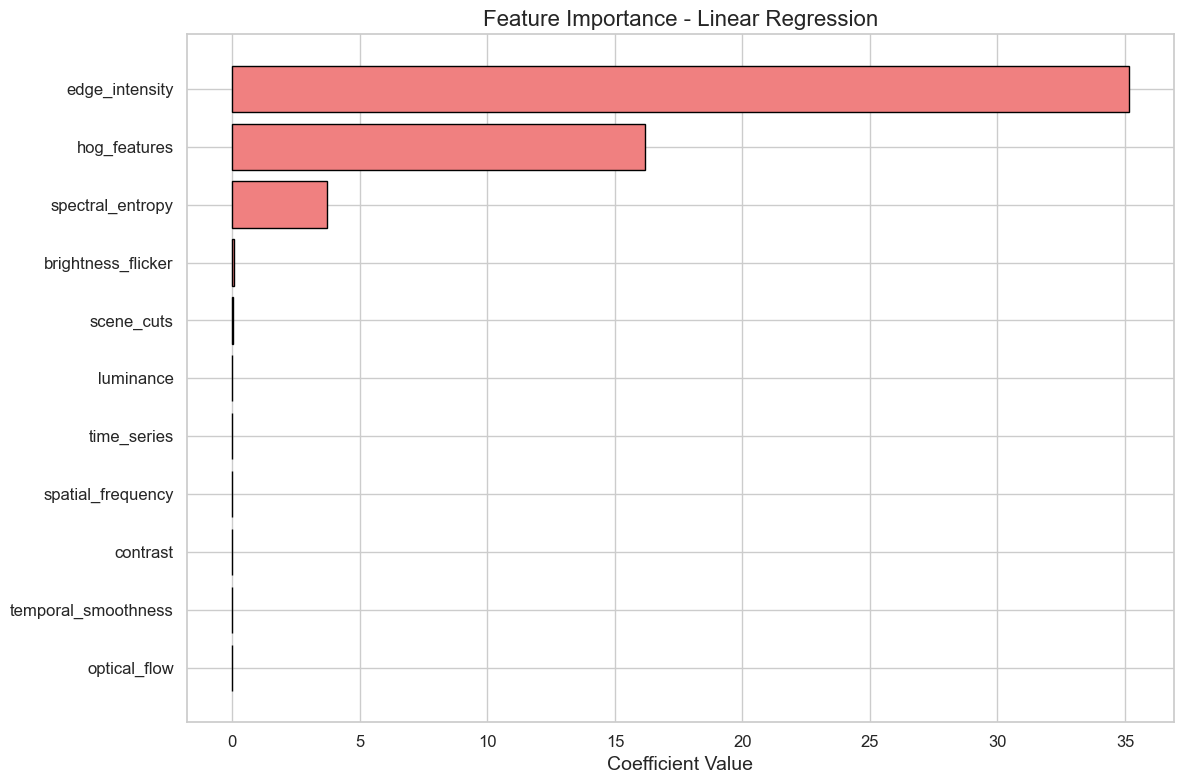


--------------------------------------------------

Ridge Regression:
R²: 0.0742
SRCC: 0.2513
PLCC: 0.2724
RMSE: 1.5162


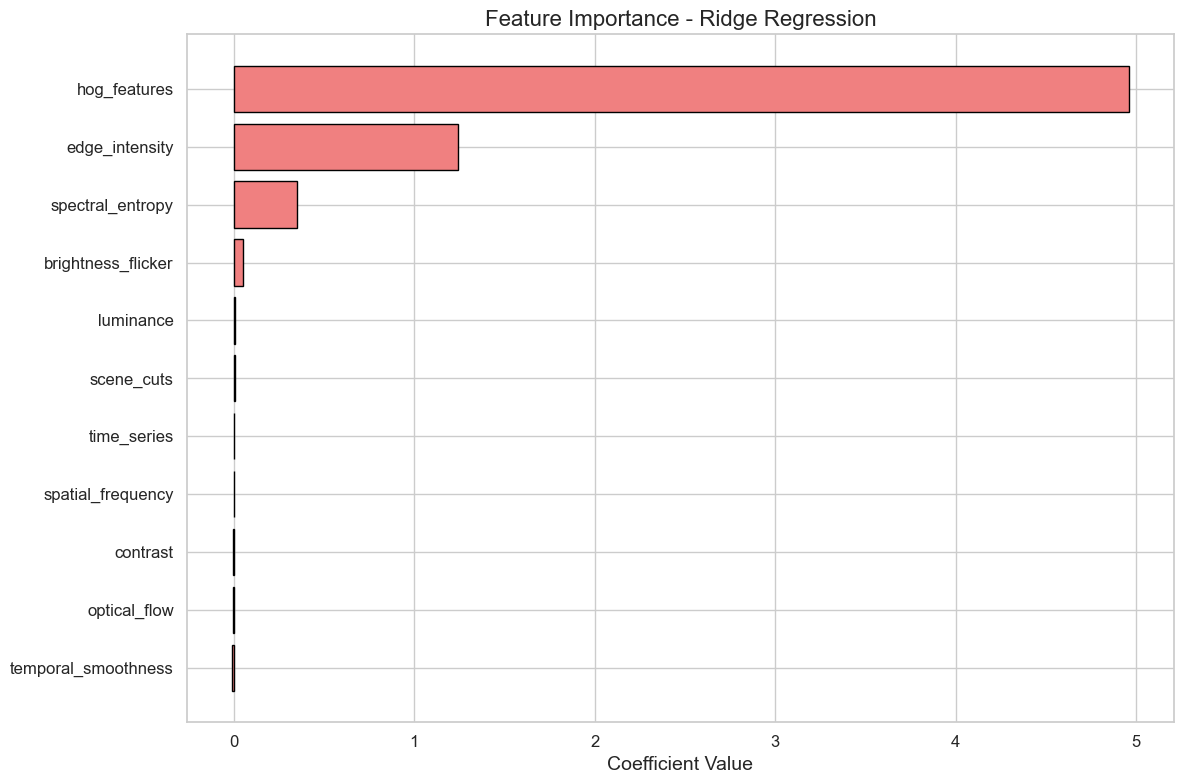


--------------------------------------------------

Random Forest:
R²: 0.1472
SRCC: 0.3214
PLCC: 0.3886
RMSE: 1.4552


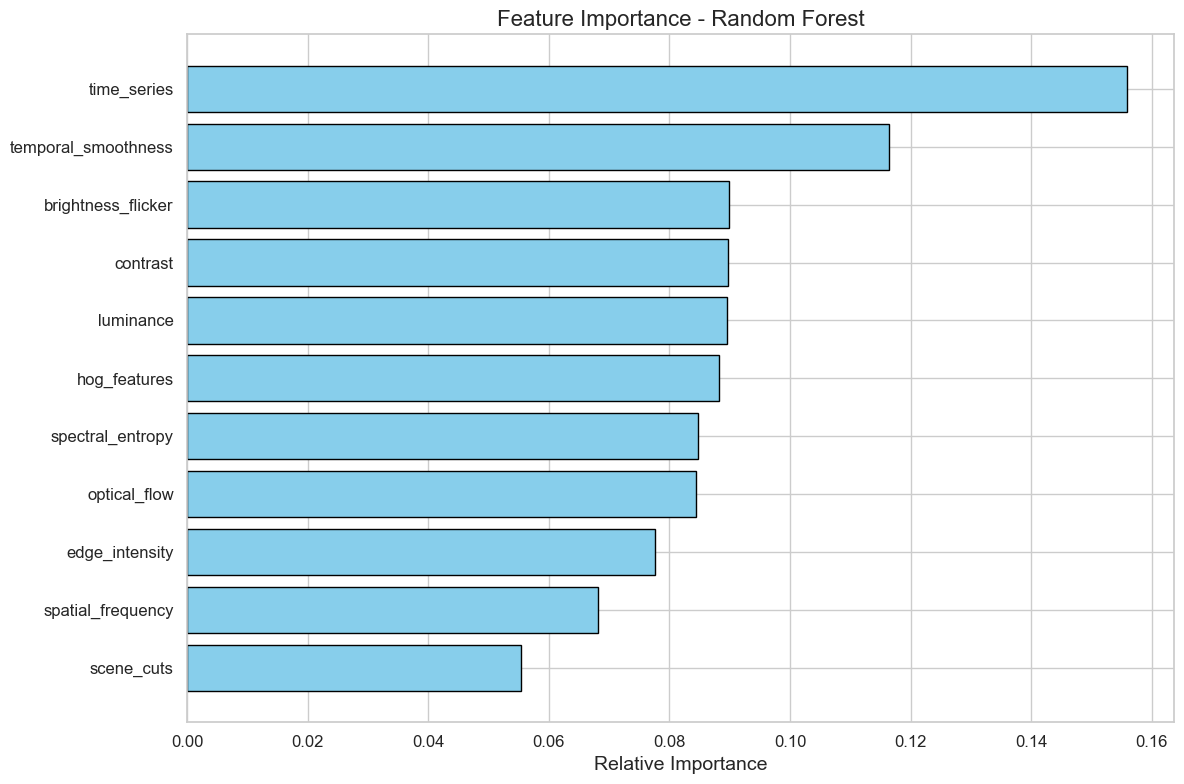


--------------------------------------------------

Gradient Boosting:
R²: 0.1199
SRCC: 0.2936
PLCC: 0.3477
RMSE: 1.4783


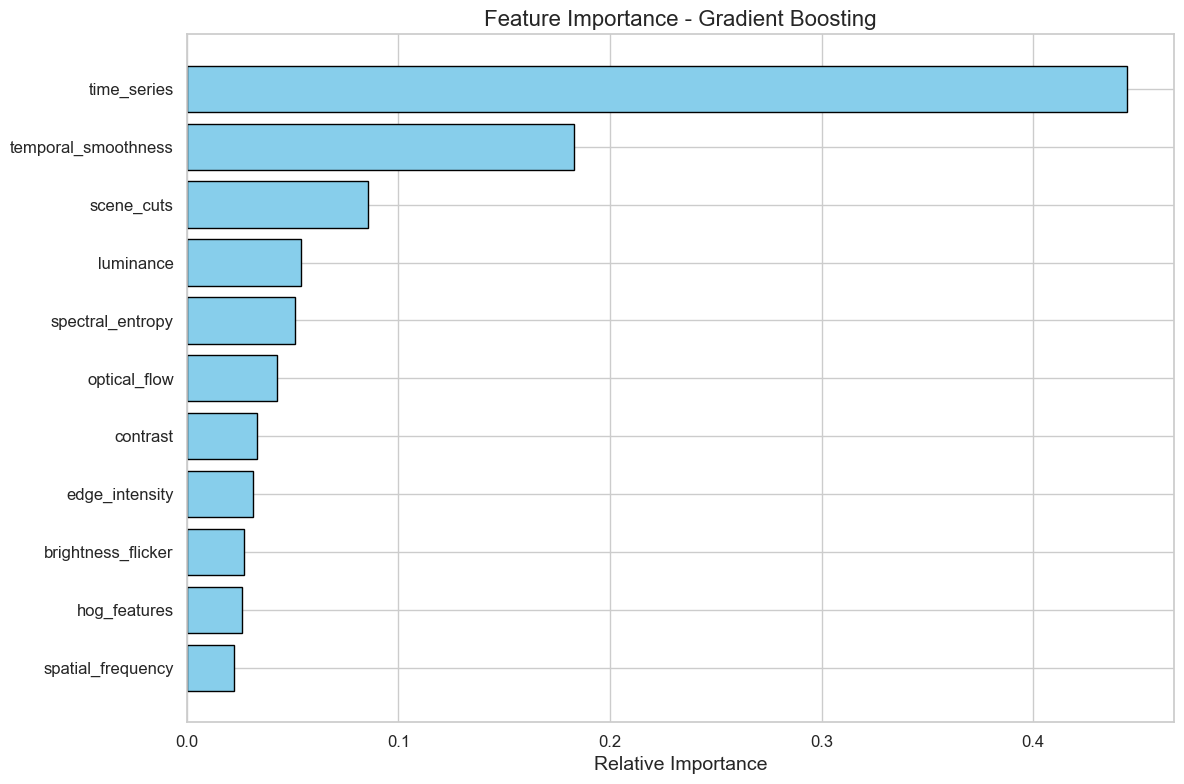


--------------------------------------------------

Support Vector Regressor:
R²: -0.2966
SRCC: 0.1303
PLCC: 0.1308
RMSE: 1.7943


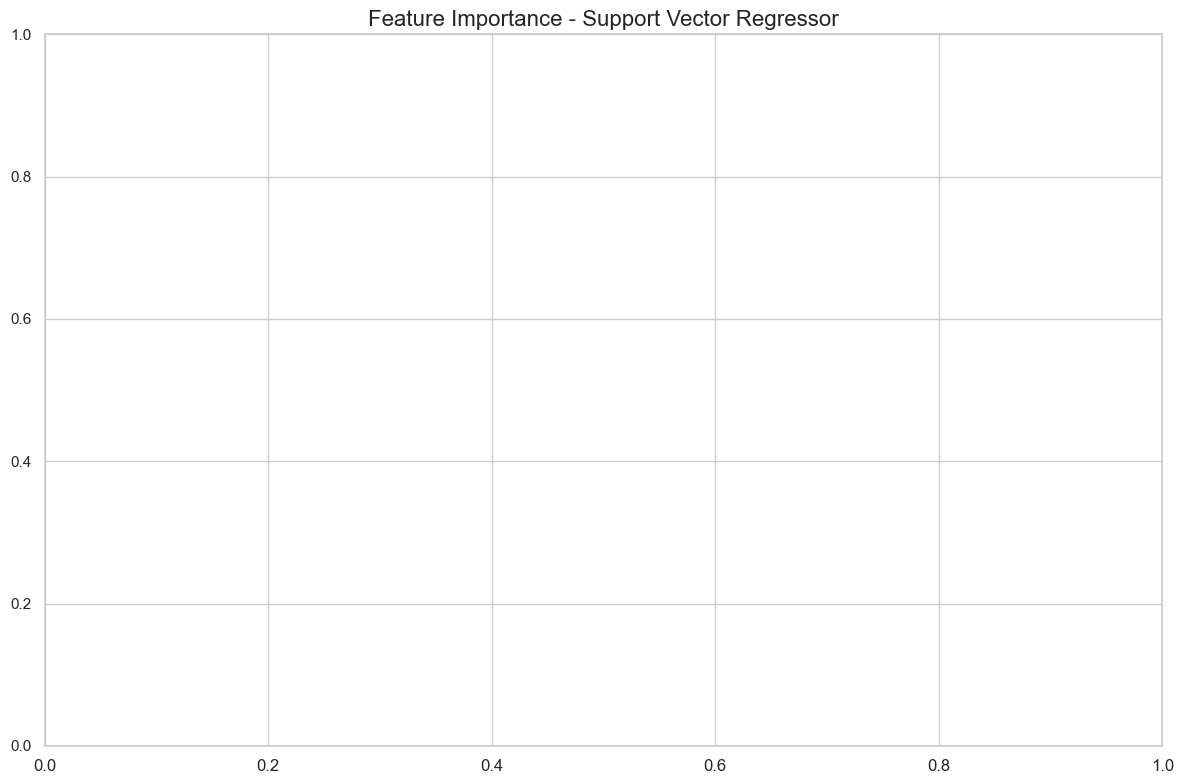


--------------------------------------------------

XGBoost Regressor:
R²: 0.1142
SRCC: 0.2868
PLCC: 0.3636
RMSE: 1.4830


c:\Users\jyoti\anaconda3\envs\save\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:53:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


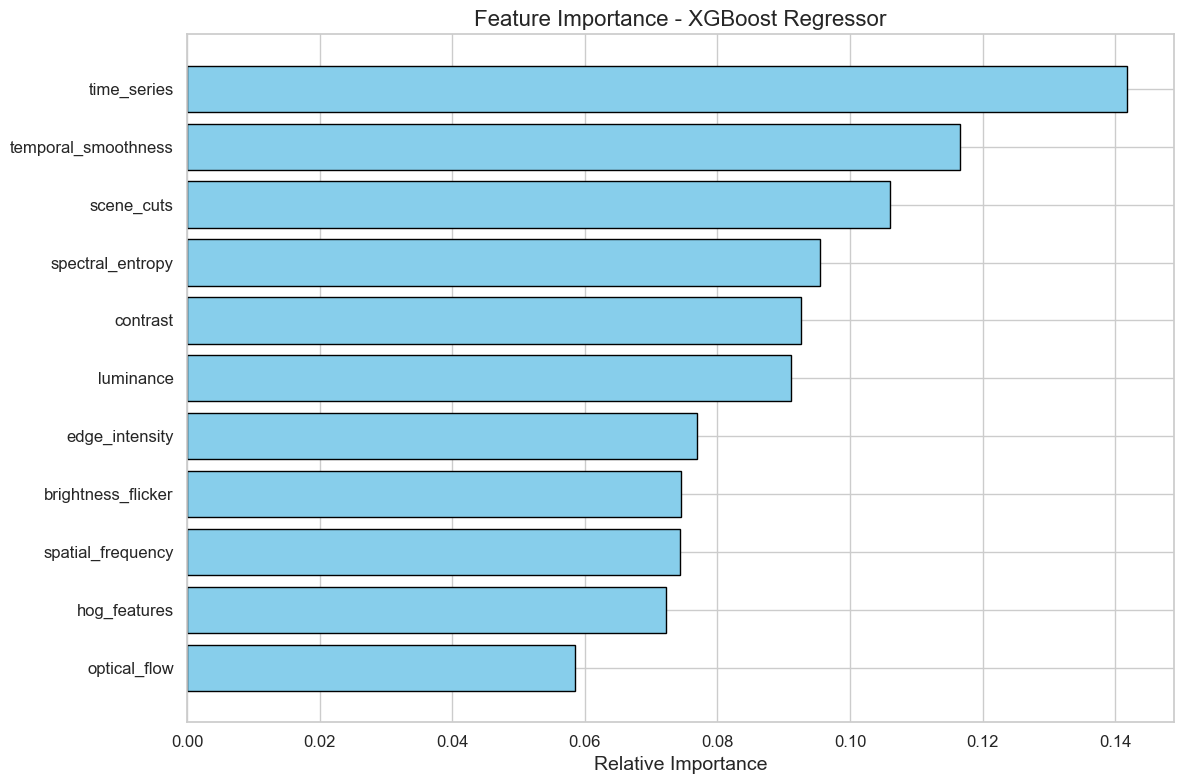


--------------------------------------------------



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

# Define features and target (replace this with your actual DataFrame)
# df = pd.read_csv('your_data.csv')

X = df[['optical_flow', 'hog_features', 'edge_intensity', 'scene_cuts',
        'temporal_smoothness', 'brightness_flicker', 'spectral_entropy',
        'spatial_frequency', 'luminance', 'contrast', 'time_series']]
y = df['fms']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(),
    "XGBoost Regressor": XGBRegressor(eval_metric='rmse', use_label_encoder=False)
}

# Function to evaluate and plot feature importance
def evaluate_and_plot(model_name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # R², SRCC, PLCC, and RMSE
    r2 = r2_score(y_test, y_pred)
    srcc, _ = spearmanr(y_test, y_pred)
    plcc, _ = pearsonr(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"{model_name}:")
    print(f"R²: {r2:.4f}")
    print(f"SRCC: {srcc:.4f}")
    print(f"PLCC: {plcc:.4f}")
    print(f"RMSE: {rmse:.4f}")
    
    # Feature Importance
    plt.figure(figsize=(12, 8))
    
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        indices = np.argsort(importances)
        plt.barh(range(len(indices)), importances[indices], align="center", color='skyblue', edgecolor='black')
        plt.yticks(range(len(indices)), [X.columns[i] for i in indices], fontsize=12)
        plt.xlabel("Relative Importance", fontsize=14)
    elif hasattr(model, "coef_"):
        importances = model.coef_
        indices = np.argsort(importances)
        plt.barh(range(len(indices)), importances[indices], align="center", color='lightcoral', edgecolor='black')
        plt.yticks(range(len(indices)), [X.columns[i] for i in indices], fontsize=12)
        plt.xlabel("Coefficient Value", fontsize=14)
    
    # Increase font size for title and axis labels
    plt.title(f"Feature Importance - {model_name}", fontsize=16)
    plt.xticks(fontsize=12)
    plt.tight_layout()

    # Save the plot as a PDF
    plt.savefig(f"{model_name}_Feature_Importance.pdf", format='pdf')

    plt.show()
    
    print("\n" + "-"*50 + "\n")

# Evaluate and plot each model
for model_name, model in models.items():
    evaluate_and_plot(model_name, model)


In [26]:
print(shap_values)

.values =
array([[[-2.57404204e-02, -1.29445329e-01, -2.97073543e-01,
          9.80843082e-02],
        [ 4.94494140e-02,  2.47445121e-01, -3.49385083e-01,
         -3.90931308e-01],
        [ 4.91297960e-01, -7.34694228e-02, -2.13050216e-01,
         -4.95250016e-01],
        ...,
        [ 1.01004493e+00, -2.05621183e-01,  9.89611819e-02,
         -1.76405859e+00],
        [ 2.09355414e-01, -1.24625331e-02, -4.29112203e-02,
         -3.11041147e-01],
        [ 1.14997876e+00,  3.62555861e-01, -6.02502060e+00,
         -1.41577566e+00]],

       [[-1.11204855e-01, -8.29123631e-02, -3.72385502e-01,
          4.62323129e-02],
        [-6.33920822e-03,  2.70494726e-03, -2.63922393e-01,
         -3.82926255e-01],
        [ 2.49806255e-01, -2.82422125e-01, -1.77737936e-01,
         -6.41977251e-01],
        ...,
        [ 7.38178015e-01, -3.78995277e-02,  4.75067832e-02,
         -1.57191181e+00],
        [ 1.97032481e-01, -2.12480605e-01, -1.22687824e-01,
         -1.67061284e-01],
     

Epoch 1/30
945/945 [==============================] - 11s 9ms/step - loss: 1.3365 - accuracy: 0.3292 - val_loss: 1.2878 - val_accuracy: 0.2582
Epoch 2/30
945/945 [==============================] - 8s 8ms/step - loss: 1.3088 - accuracy: 0.3712 - val_loss: 1.3121 - val_accuracy: 0.3039
Epoch 3/30
945/945 [==============================] - 8s 9ms/step - loss: 1.2858 - accuracy: 0.3818 - val_loss: 1.3362 - val_accuracy: 0.2470
Epoch 4/30
945/945 [==============================] - 8s 8ms/step - loss: 1.2695 - accuracy: 0.3882 - val_loss: 1.2789 - val_accuracy: 0.3251
Epoch 5/30
945/945 [==============================] - 8s 9ms/step - loss: 1.2544 - accuracy: 0.4024 - val_loss: 1.3029 - val_accuracy: 0.2638
Epoch 6/30
945/945 [==============================] - 8s 9ms/step - loss: 1.2451 - accuracy: 0.4084 - val_loss: 1.2668 - val_accuracy: 0.3155
Epoch 7/30
945/945 [==============================] - 9s 9ms/step - loss: 1.2334 - accuracy: 0.4179 - val_loss: 1.2804 - val_accuracy: 0.3047
Epoch

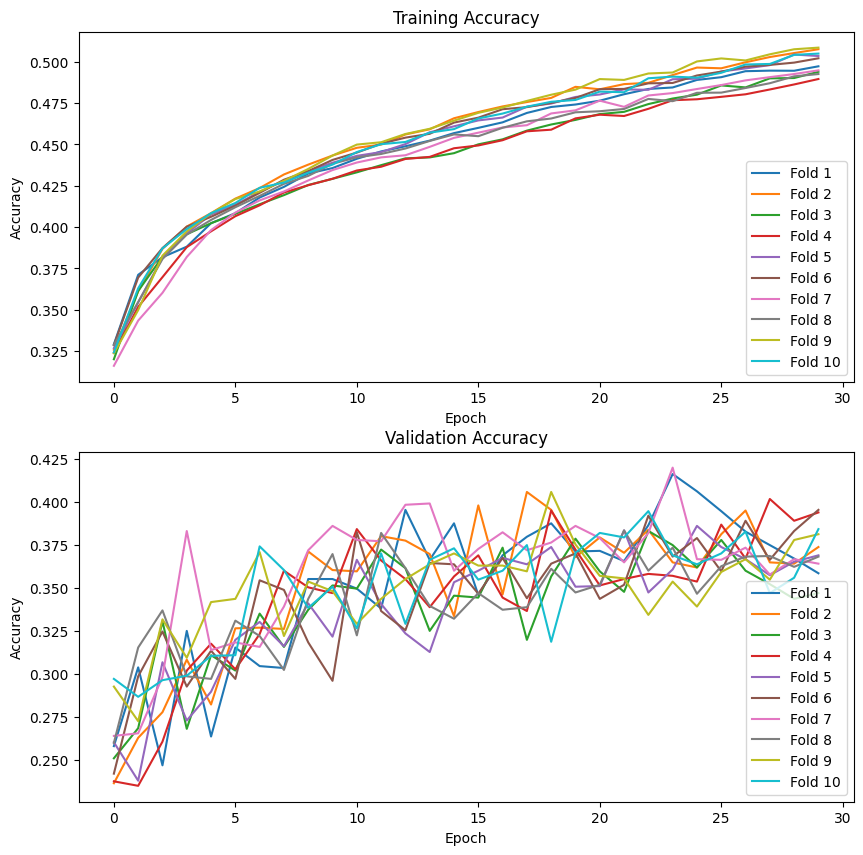

In [34]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Assuming X and y are your features and target
X = df[['optical_flow', 'hog_features', 'edge_intensity', 'scene_cuts',
       'temporal_smoothness', 'brightness_flicker', 'spectral_entropy',
       'spatial_frequency', 'luminance', 'contrast', 'time_series']].values
y = df['cs'].values

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Define LSTM model
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(64))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(4, activation='softmax'))  # Assuming 4 classes in 'cs'
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# 10-fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
fold_no = 1
training_accuracies = []
validation_accuracies = []

for train_index, val_index in kf.split(X, y_encoded):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y_categorical[train_index], y_categorical[val_index]

    # Apply SMOTE to the training data
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_encoded[train_index])
    y_train_resampled_categorical = to_categorical(y_train_resampled)

    # Reshape input to be 3D [samples, timesteps, features] as required by LSTM
    X_train_resampled = np.reshape(X_train_resampled, (X_train_resampled.shape[0], X_train_resampled.shape[1], 1))
    X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))

    # Create the model
    model = create_model((X_train_resampled.shape[1], 1))

    # Train the model
    history = model.fit(X_train_resampled, y_train_resampled_categorical, epochs=30, batch_size=64, 
                        validation_data=(X_val, y_val), verbose=1)

    # Evaluate the model
    val_predictions = np.argmax(model.predict(X_val), axis=1)
    y_val_true = np.argmax(y_val, axis=1)

    val_predictions = val_predictions.astype(int)
    y_val_true = y_val_true.astype(int)

    # Metrics for the current fold
    print(f'Fold {fold_no}')
    print(classification_report(y_val_true, val_predictions, target_names=label_encoder.classes_.astype(str)))
    print("Accuracy: ", accuracy_score(y_val_true, val_predictions))
    
    training_accuracies.append(history.history['accuracy'])
    validation_accuracies.append(history.history['val_accuracy'])

    fold_no += 1

# Plot training and validation loss/accuracy
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
for i in range(10):
    axs[0].plot(training_accuracies[i], label=f'Fold {i+1}')
    axs[1].plot(validation_accuracies[i], label=f'Fold {i+1}')

axs[0].set_title('Training Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

axs[1].set_title('Validation Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.show()


In [27]:
# Loop through each class and plot SHAP values
for class_index in range(len(shap_values.values[0][0])):
    class_shap_values = shap_values[:, class_index]
    shap.summary_plot(class_shap_values, X_res, title=f"SHAP Summary Plot for Class {class_index}")


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.